In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import permutation_importance
from PIL import Image, ImageDraw

import joblib
import shap
import category_encoders as ce
import xgboost as xgb

In [25]:
df_nasdaq = pd.read_csv('df_nasdaq.csv')
df_sp500 = pd.read_csv('df_sp500.csv')
df_dji = pd.read_csv('df_dji.csv')

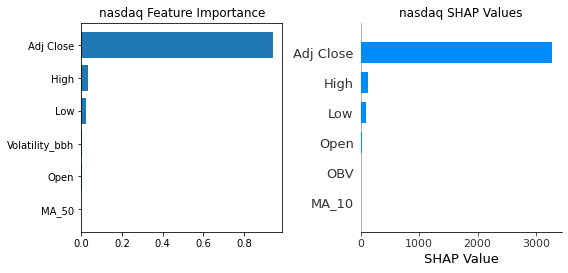

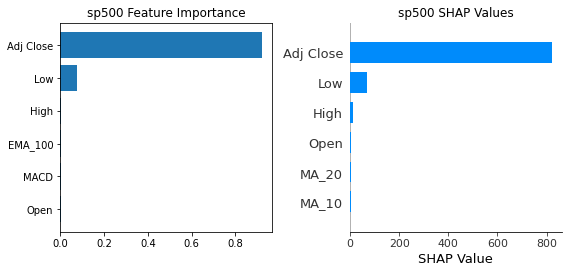

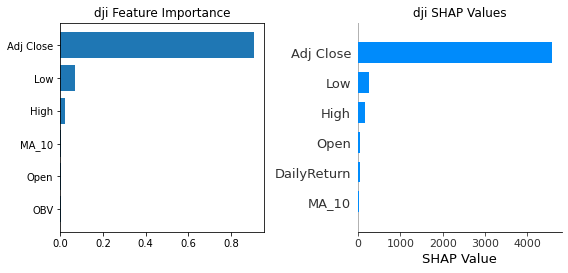

In [26]:
target = 'Close'
stock_name = {'nasdaq': df_nasdaq, 'sp500': df_sp500, 'dji': df_dji}

n_top_features = 6

for stock in stock_name.keys():
    
    df = stock_name[stock]
    y = df[target]
    X = df.drop(columns=[target, 'Date'])
    
    train_size = int(len(df) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    
    encoder = ce.LeaveOneOutEncoder(return_df=True)
    X_train_loo = encoder.fit_transform(X_train, y_train)
    X_test_loo = encoder.transform(X_test)
    
    model = xgb.XGBRegressor(n_estimators=500, max_depth=5, eta=0.05)
    model.fit(X_train_loo, y_train)
      
    filename = f"xgb/{stock}_xgb_model.sav"
    joblib.dump(model, filename)
    
    feature_importance = model.feature_importances_
    sorted_idx = np.argsort(feature_importance)
    
    # Plot feature importance
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].barh(range(n_top_features), feature_importance[sorted_idx[-n_top_features:]])
    axs[0].set_title(f'{stock} Feature Importance')
    axs[0].set_yticks(range(n_top_features))
    axs[0].set_yticklabels(np.array(X_test_loo.columns)[sorted_idx[-n_top_features:]])
    
    # Compute SHAP values for test set
    explainer = shap.Explainer(model)
    shap_values = explainer(X_test_loo)
    
    # Plot SHAP values for top features
    shap.summary_plot(shap_values, X_test_loo, plot_type="bar", feature_names=X_test_loo.columns,
                      max_display=n_top_features, show=False)
    
    # Show plot
    axs[1].set_title(f'{stock} SHAP Values')
    axs[1].set_xlabel('SHAP Value')
    
    plt.tight_layout()
    plt.show()

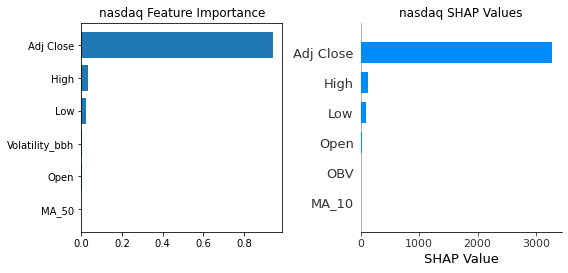

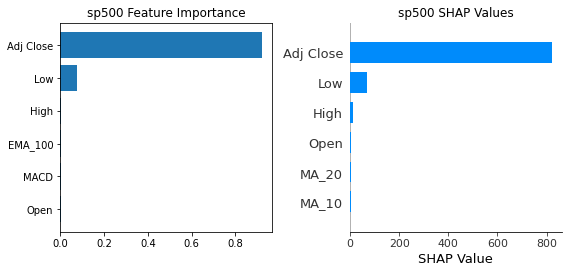

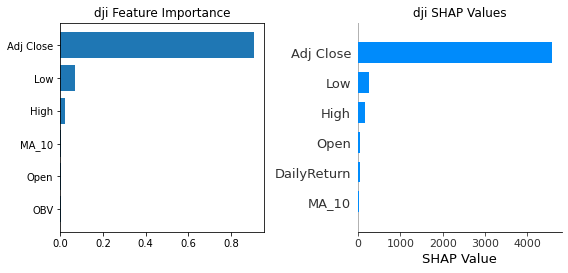

In [34]:
arget = 'Close'
stock_name = {'nasdaq': df_nasdaq, 'sp500': df_sp500, 'dji': df_dji}

n_top_features = 6

for stock in stock_name.keys():
    
    df = stock_name[stock]
    y = df[target]
    X = df.drop(columns=[target, 'Date'])
    
    train_size = int(len(df) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    
    encoder = ce.LeaveOneOutEncoder(return_df=True)
    X_train_loo = encoder.fit_transform(X_train, y_train)
    X_test_loo = encoder.transform(X_test)
    
    model = xgb.XGBRegressor(n_estimators=500, max_depth=5, eta=0.05)
    model.fit(X_train_loo, y_train)
      
    filename = f"xgb/{stock}_xgb_model.sav"
    joblib.dump(model, filename)
    
    feature_importance = model.feature_importances_
    sorted_idx = np.argsort(feature_importance)
    
    # Plot feature importance
    fig, axs = plt.subplots(1, 2, figsize=(16, 12))
    axs[0].barh(range(n_top_features), feature_importance[sorted_idx[-n_top_features:]])
    axs[0].set_title(f'{stock} Feature Importance')
    axs[0].set_yticks(range(n_top_features))
    axs[0].set_yticklabels(np.array(X_test_loo.columns)[sorted_idx[-n_top_features:]])
    
    # Compute SHAP values for test set
    explainer = shap.Explainer(model)
    shap_values = explainer(X_test_loo)
    
    # Plot SHAP values for top features
    shap.summary_plot(shap_values, X_test_loo, plot_type="bar", feature_names=X_test_loo.columns,
                      max_display=n_top_features, show=False)
    
    # Show plot
    axs[1].set_title(f'{stock} SHAP Values')
    axs[1].set_xlabel('SHAP Value')
    
    plt.tight_layout()
    plt.savefig(f'graph/{stock}_feature_importance_based_on_XGBoost.jpg')
    plt.show()

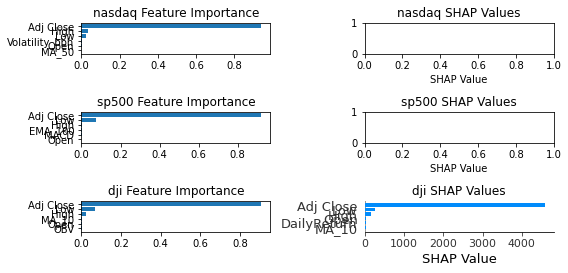

In [19]:
n_top_features = 6

fig, axs = plt.subplots(len(stock_name), 2, figsize=(12, 16))

for idx, stock in enumerate(stock_name.keys()):
    
    df = stock_name[stock]
    y = df[target]
    X = df.drop(columns=[target, 'Date'])
    
    train_size = int(len(df) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    
    encoder = ce.LeaveOneOutEncoder(return_df=True)
    X_train_loo = encoder.fit_transform(X_train, y_train)
    X_test_loo = encoder.transform(X_test)
    
    model = xgb.XGBRegressor(n_estimators=500, max_depth=5, eta=0.05)
    model.fit(X_train_loo, y_train)
      
    filename = f"xgb/{stock}_xgb_model.sav"
    joblib.dump(model, filename)
    
    feature_importance = model.feature_importances_
    sorted_idx = np.argsort(feature_importance)
    
    # Plot feature importance
    axs[idx, 0].barh(range(n_top_features), feature_importance[sorted_idx[-n_top_features:]])
    axs[idx, 0].set_title(f'{stock} Feature Importance')
    axs[idx, 0].set_yticks(range(n_top_features))
    axs[idx, 0].set_yticklabels(np.array(X_test_loo.columns)[sorted_idx[-n_top_features:]])
    
    # Compute SHAP values for test set
    explainer = shap.Explainer(model)
    shap_values = explainer(X_test_loo)
    
    # Plot SHAP values for top features
    shap.summary_plot(shap_values, X_test_loo, plot_type="bar", feature_names=X_test_loo.columns,
                      max_display=n_top_features, show=False)
    
    # Show plot
    axs[idx, 1].set_title(f'{stock} SHAP Values')
    axs[idx, 1].set_xlabel('SHAP Value')

plt.tight_layout()
plt.savefig('all_feature_importance_based_on_XGBoost.jpg')
plt.show()